<a href="https://colab.research.google.com/github/amol004/Airbnb-booking-analysis/blob/main/Airbnb_bookings_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Airbnb Booking Analysis**
## **by Amol Thakur**
### **Github repo link : https://github.com/amol004/Airbnb-booking-analysis.git**
### **Email : amolthakur004@gmail.com**


---



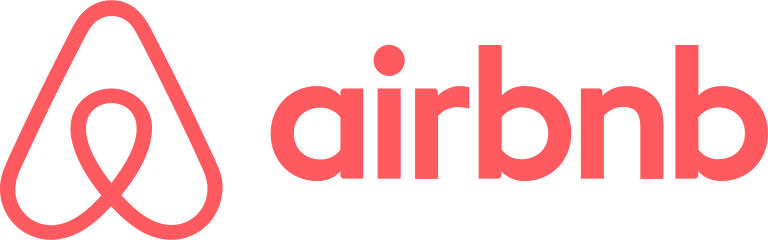






---

# **Problem Statement and Business Objective:**
### **Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values.**



---


# **Description of Dataset:**

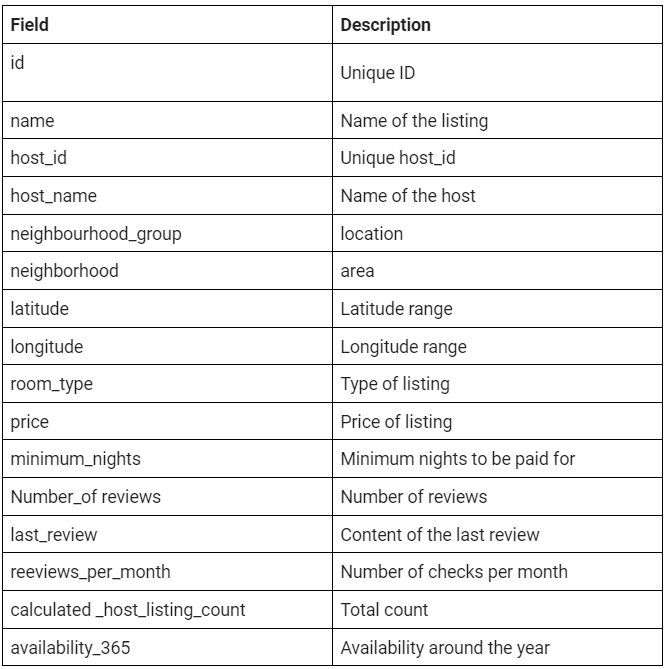



---


# **Part 1 : Data Analysis**

In [43]:
# used for numerical operations
import numpy as np
# for data manipulation
import pandas as pd 
# for data vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
# for visualizing missing/null values in our data frame
import missingno as msno 
# for manipulation of data with type datetime
from datetime import datetime
# used to remove warnings for better asthetics 
import warnings
warnings.filterwarnings('ignore')
# to increase the number of visible columns in our data frame
from google.colab.data_table import DataTable
DataTable.max_columns = 30

In [44]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Reading our first csv file (Airbnb NYC 2019.csv) and storing it in a variable airbnb_df
airbnb_df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')


In [46]:
# checking out our dataset
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [47]:
# using info method to analyze our dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [48]:
# checking number of null values present in our columns
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [49]:
# using .describe() method to form statistical overview of our dataframe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [50]:
# Dropping all the properties that are not avalible for atleast a single day throughout the year from our dataframe
airbnb_df= airbnb_df.drop(airbnb_df[airbnb_df['availability_365']==0].index)

In [51]:
# Rechecking our dataset after filtering out all the unnecessary values
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [52]:
# checking row wise null values present in dataframe
airbnb_df.isnull().sum(axis=1).sort_values(ascending=False)

38992    3
2854     3
16071    3
43581    2
43563    2
        ..
20228    0
20227    0
20226    0
20225    0
29394    0
Length: 31362, dtype: int64

In [53]:
# Retaining all the rows that contains less than 2 null values
airbnb_df=airbnb_df[airbnb_df.isnull().sum(axis=1)<2]
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [54]:
# Dropping duplicates
airbnb_df=airbnb_df.drop_duplicates(keep='first')

In [55]:
# Changing the data type of last_review column from 'object' to Datetime
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'])

In [56]:
# Conforming above operations
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26155 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              26155 non-null  int64         
 1   name                            26153 non-null  object        
 2   host_id                         26155 non-null  int64         
 3   host_name                       26148 non-null  object        
 4   neighbourhood_group             26155 non-null  object        
 5   neighbourhood                   26155 non-null  object        
 6   latitude                        26155 non-null  float64       
 7   longitude                       26155 non-null  float64       
 8   room_type                       26155 non-null  object        
 9   price                           26155 non-null  int64         
 10  minimum_nights                  26155 non-null  int64         
 11  nu

# **Data Visualization**


---



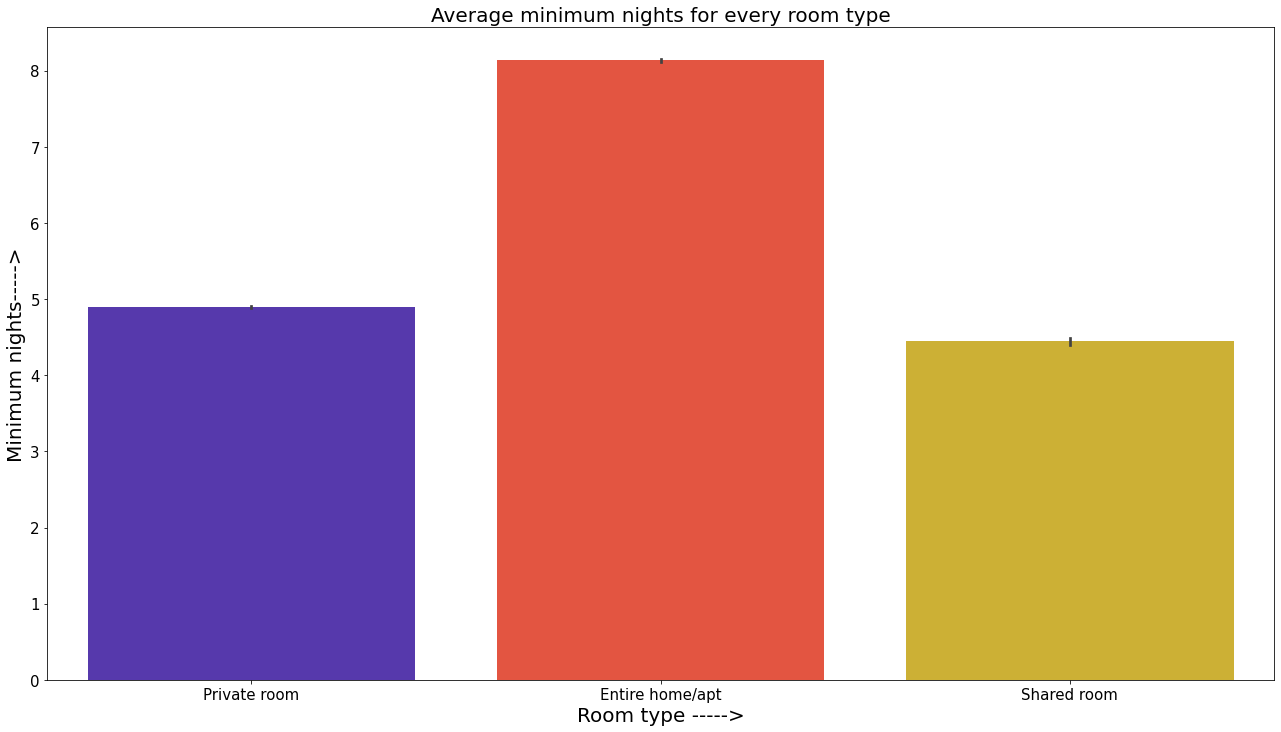

In [73]:
#Average minimum nights for every room type
sns.barplot(x="room_type",y="minimum_nights",data=airbnb_df,palette="CMRmap",ci=10)
# title 
plt.title('Average minimum nights for every room type',fontsize=20)
# x axis label 
plt.xlabel('Room type ----->',fontsize=20)
# y axis label 
plt.ylabel('Minimum nights----->',fontsize=20);

In [58]:
# Top 5 most expensive properties and their locations
bb=airbnb_df.groupby(['name','neighbourhood_group'])['price'].max().sort_values(ascending=False).head()
bb.reset_index()

,name,neighbourhood_group,price
0,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,9999
1,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,8500
2,Film Location,Brooklyn,8000
3,Gem of east Flatbush,Brooklyn,7500
4,UWS 1BR w/backyard + block from CP,Manhattan,6000


In [59]:
# Finding out most expensive location in NYC 
ab=airbnb_df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
ab.reset_index()

,neighbourhood_group,price
0,Manhattan,195.927680
1,Brooklyn,128.328957
2,Queens,95.374966
3,Staten Island,88.975610
4,Bronx,80.630952


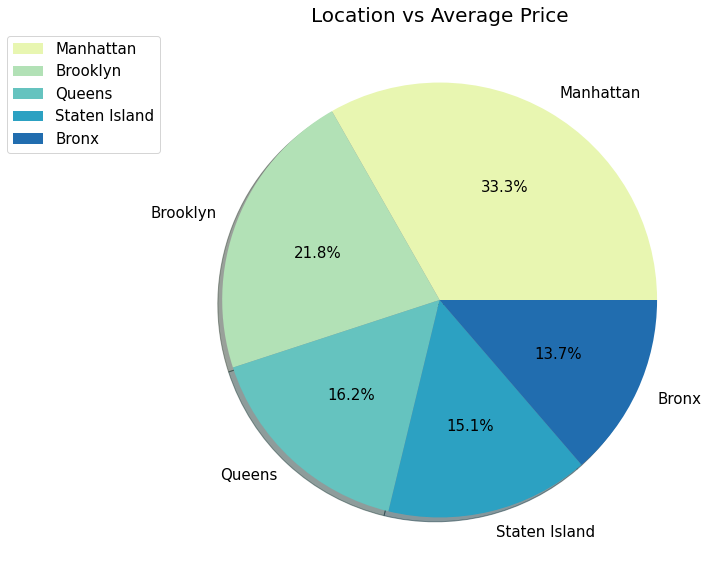

In [60]:
# Pie chart for above analysis
plt.rcParams['figure.figsize']=(15,10) # figure size
plt.rcParams['font.size'] = 15 # font size
plt.pie(ab,labels=['Manhattan','Brooklyn','Queens','Staten Island','Bronx'],colors = sns.color_palette('YlGnBu'),autopct='%1.1f%%',shadow=True)
plt.title('Location vs Average Price',fontsize=20) # Title
plt.legend(bbox_to_anchor=(0,1)); # Used to display and adjust the position of information box that is present on the left side of this pie chart

In [61]:
# Top 10 highest visitors
mm=airbnb_df.host_name.value_counts().head(10)
mm=pd.DataFrame(mm)
mm



,host_name
Sonder (NYC),207
Michael,207
David,198
John,190
Alex,159
Maria,130
Mike,119
Anna,114
Melissa,102
Jason,99


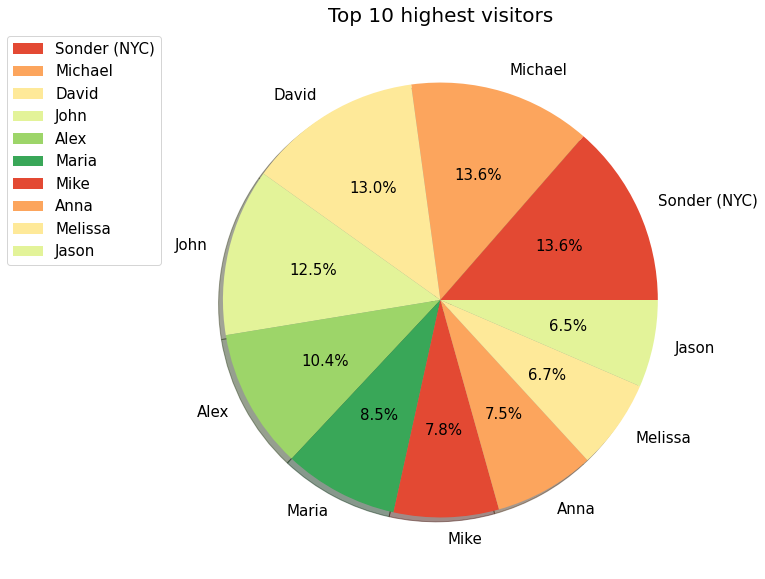

In [62]:
plt.rcParams['figure.figsize']=(15,10) # figure size
plt.rcParams['font.size'] = 15 # font size
plt.pie(mm,colors = sns.color_palette('RdYlGn'),labels=['Sonder (NYC)','Michael','David','John','Alex','Maria','Mike','Anna','Melissa','Jason'],autopct='%1.1f%%',shadow=True);
plt.title('Top 10 highest visitors',fontsize=20) # Title
plt.legend(bbox_to_anchor=(0,1)); # Used to display and adjust the position of information box that is present on the left side of this pie chart

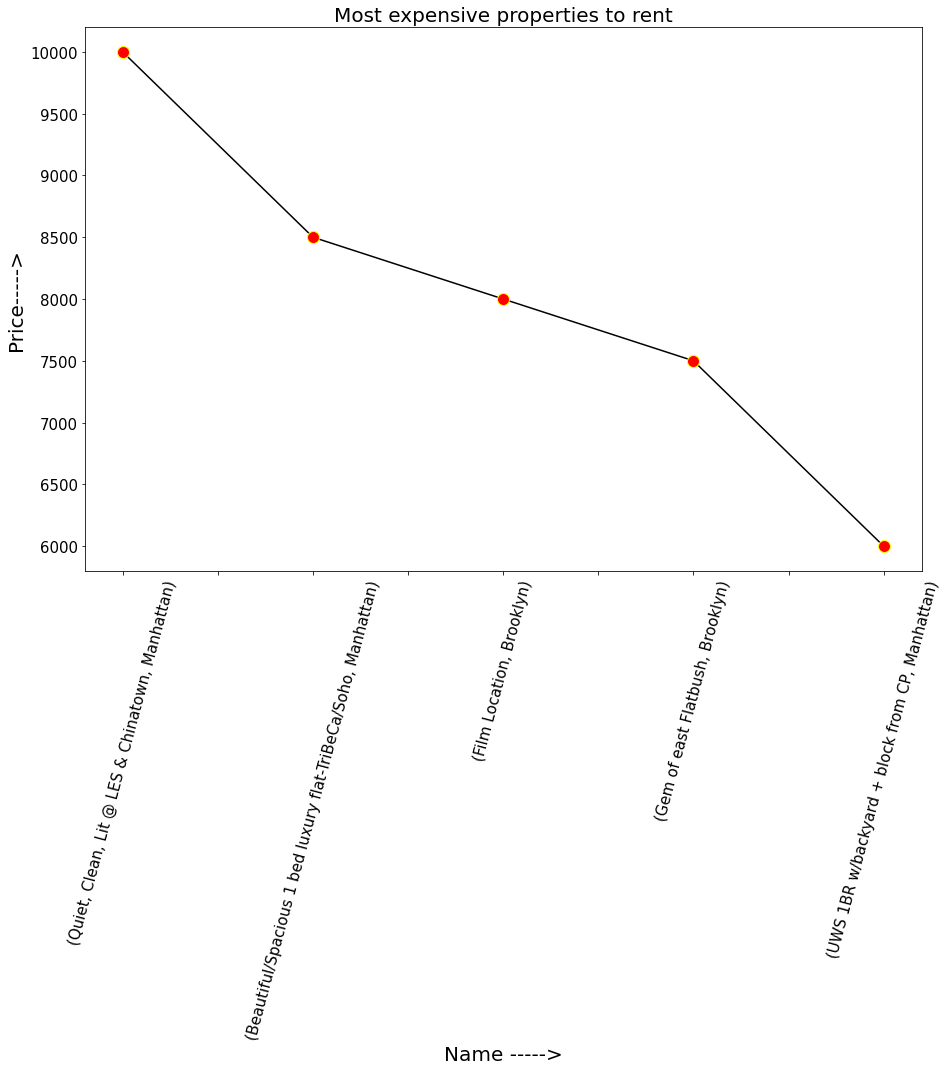

In [63]:
# top 5 most expensive properties to rent 
bb.plot(kind='line',marker='o', markersize=12,mec = 'yellow',mfc = 'red',color='black')
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (16,8)
# title 
plt.title('Most expensive properties to rent',fontsize=20)
# x axis label 
plt.xlabel('Name ----->',fontsize=20)
# y axis label 
plt.ylabel('Price----->',fontsize=20);

In [64]:
# Top 10 most reviewed properties
ll=airbnb_df.groupby('name')['number_of_reviews'].max().sort_values(ascending=False).head(10)
ll.reset_index()

,name,number_of_reviews
0,Room near JFK Queen Bed,629
1,Great Bedroom in Manhattan,607
2,Beautiful Bedroom in Manhattan,597
3,Private Bedroom in Manhattan,594
4,Room Near JFK Twin Beds,576
5,Steps away from Laguardia airport,543
6,Manhattan Lux Loft.Like.Love.Lots.Look !,540
7,Cozy Room Family Home LGA Airport NO CLEANING FEE,510
8,Private brownstone studio Brooklyn,488
9,My Little Guest Room in Flushing,474


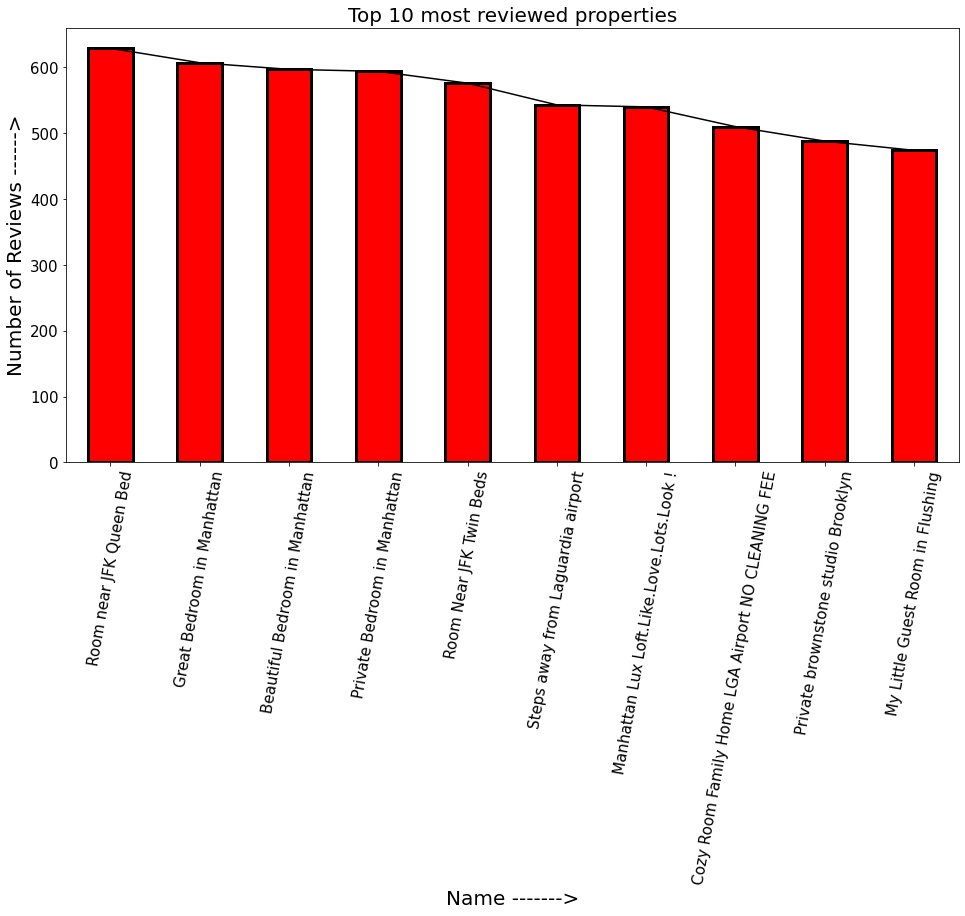

In [65]:
ll.plot(color='black') # line color
ll.plot(kind='bar',color=['red'],linewidth=3,edgecolor='black') # plottting barplot using matplotlib
plt.title('Top 10 most reviewed properties',fontsize=20) # title
plt.xlabel('Name ------->',fontsize=20) # x axis label
plt.ylabel('Number of Reviews ------>',fontsize=20) # y axis label
plt.xticks(rotation=80); # x axis labels rotation

In [66]:
# Top 10 most visited properties by users
hh=airbnb_df.groupby('name')['calculated_host_listings_count'].max().sort_values(ascending=False).head(10).reset_index()
hh

,name,calculated_host_listings_count
0,Sonder | Stock Exchange | Central 2BR + Lounge,327
1,Sonder | The Nash | Original 1BR + Rooftop,327
2,Sonder | Stock Exchange | Polished 1BR + Sofa Bed,327
3,Sonder | The Nash | Lovely Studio + Rooftop,327
4,Sonder | Stock Exchange | Polished 3BR + Kitchen,327
5,Sonder | Stock Exchange | Premier 2BR + Kitchen,327
6,Sonder | Stock Exchange | Premier 2BR + Laundry,327
7,Sonder | Stock Exchange | Premier 2BR + Lounge,327
8,Sonder | Stock Exchange | Premier 2BR + Sofa Bed,327
9,Sonder | Stock Exchange | Pristine 1BR + Kitchen,327


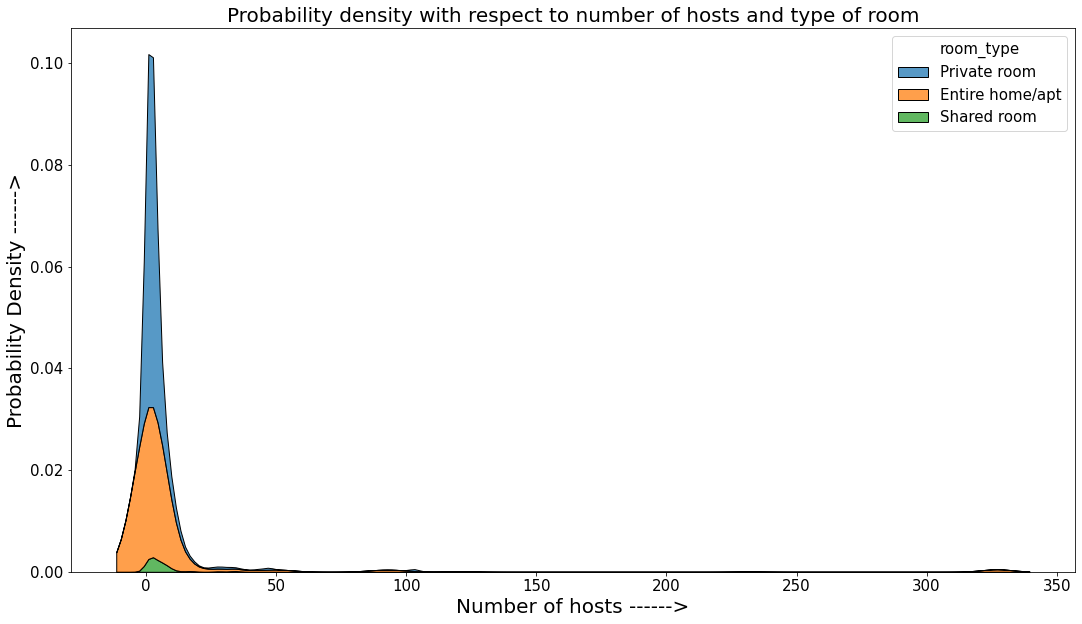

In [67]:
#Probability density with respect to number of hosts and type of room
plt.rcParams['figure.figsize'] = (18,10)# figure size
sns.kdeplot(data=airbnb_df, x="calculated_host_listings_count", hue="room_type",multiple="stack")
plt.title('Probability density with respect to number of hosts and type of room',fontsize=20) #title
plt.ylabel('Probability Density ------>',fontsize=20) # y axis label
plt.xlabel('Number of hosts ------>',fontsize=20); # x axis label

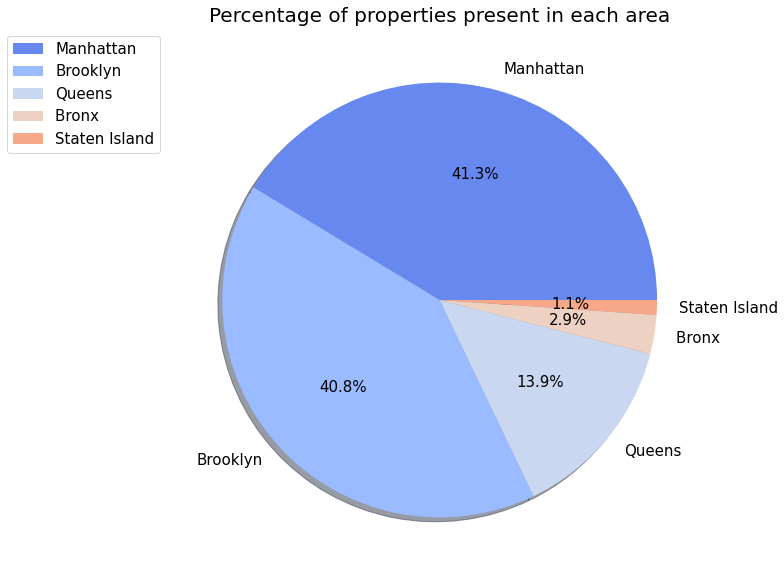

In [68]:
plt.rcParams['figure.figsize'] = (15,10) #figure size
plt.pie(airbnb_df['neighbourhood_group'].value_counts(),labels=['Manhattan','Brooklyn','Queens','Bronx ','Staten Island'],colors = sns.color_palette('coolwarm'),autopct='%1.1f%%',shadow=True)
plt.title('Percentage of properties present in each area',fontsize=20) #title
plt.legend(bbox_to_anchor=(0,1)); #label info box placement

In [69]:
# Numerical values for above pie chart
airbnb_df.neighbourhood_group.value_counts().reset_index()

,index,neighbourhood_group
0,Manhattan,10813
1,Brooklyn,10664
2,Queens,3635
3,Bronx,756
4,Staten Island,287


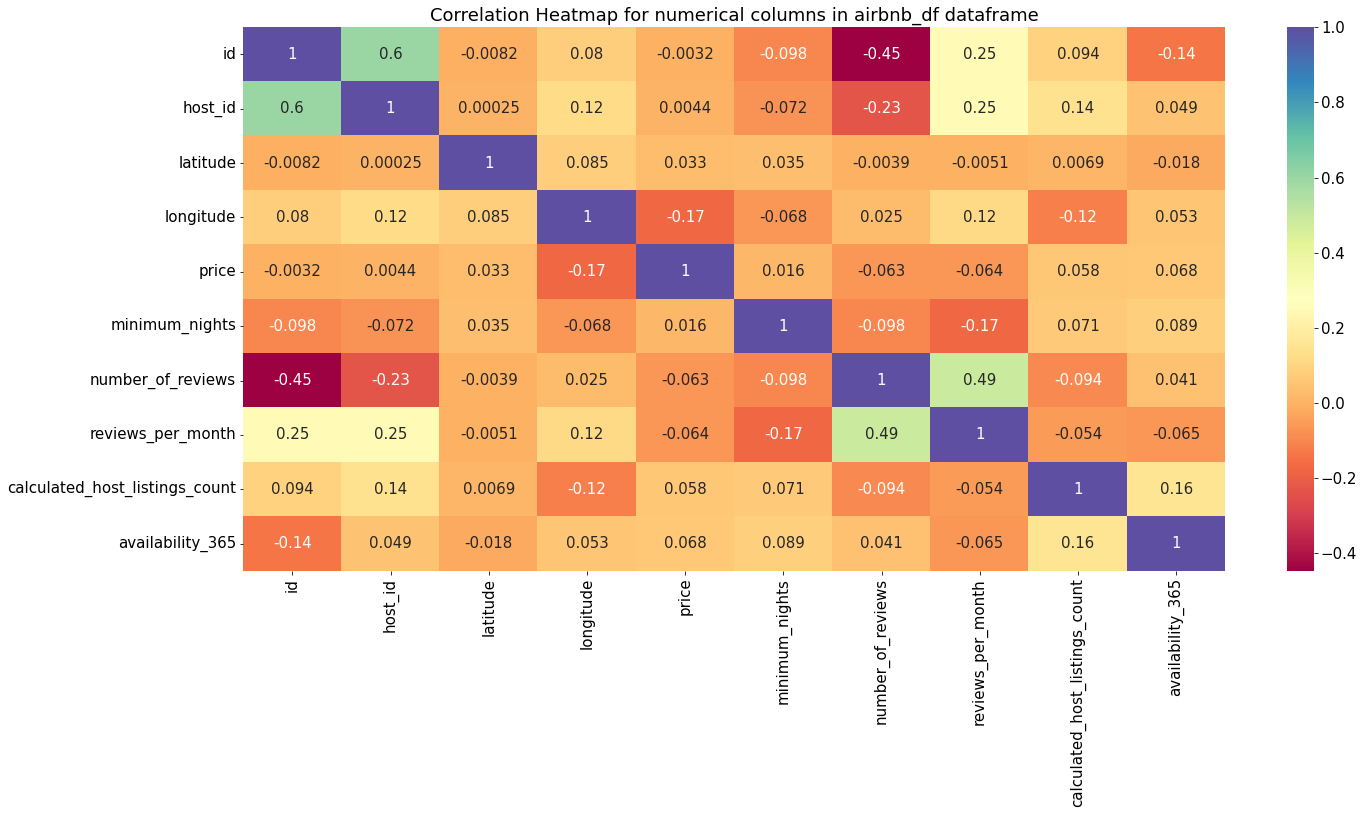

In [70]:
# Correlation heatmap for Airbnb dataset
plt.figure(figsize=(22,10))
plt.title("Correlation Heatmap for numerical columns in airbnb_df dataframe")
sns.heatmap(airbnb_df.corr(),annot=True,cmap='Spectral');

In [71]:
# Using log to remove high variance
airbnb_df['normalized_price'] = np.log2(airbnb_df['price'])

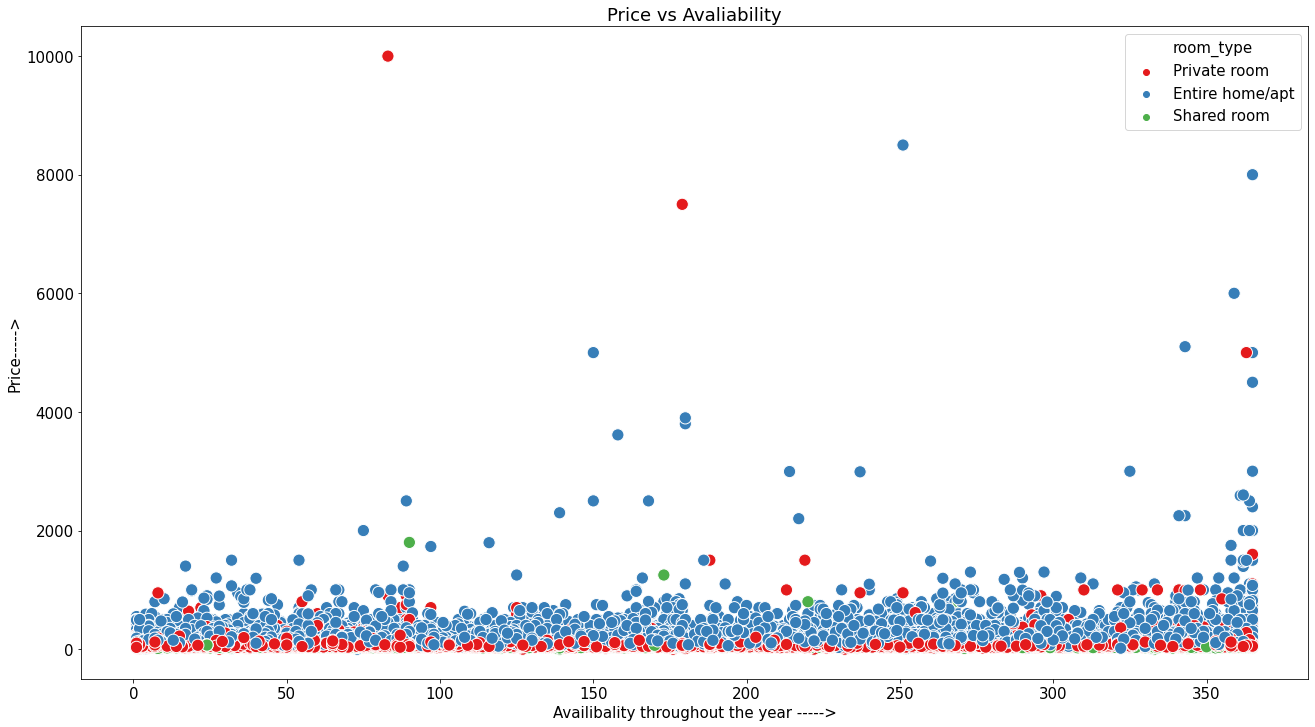

In [82]:
# Relation between price and availability throughout the year
plt.rcParams['figure.figsize'] = (22,12)  # figure size
sns.scatterplot(x='availability_365', y='price', hue='room_type', data=airbnb_df, palette='Set1',s=150);
plt.title('Price vs Avaliability'); # title
plt.ylabel('Price----->'); # y axis label
plt.xlabel('Availibality throughout the year ----->');